# **03 - DataVisualization**

## Objectives

* Answer Business requirement 1:
  * The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train

## Outputs

* Image montages displaying samples of the original images for each label.
* Plots for avarage and variability of images per label.
* Plot to distinguish the contrast between avarage for healthy cherry leaves and avarage for leaves with powdery mildew.
* Plot to distinguish the contrast between variability for healthy cherry leaves and variability for leaves with powdery mildew.

## Additional Comments

* No additional comments. 



---

# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

---

# Set Data directory variables

## Change working directory

* Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

* The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Input directory variables

In [3]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_data_dir = data_dir + '/train'
val_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

## Output directory variables

In [4]:
# declare the name of your output folder
output_dir = 'current_output'

In [5]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(output_dir):
    try:
        os.makedirs(name=f'outputs/{output_dir}')
        print(f'Current output folder is {output_dir}')
        return f'outputs/{output_dir}'
    except:
        print(f'Current output folder is {output_dir}. Note that this is an already existing folder.')
        return f'outputs/{output_dir}'
version_output = create_output_dir(output_dir)

Current output folder is current_output


## Data label names variables

In [6]:
labels = os.listdir(train_data_dir)
print(f'Datalabels are {labels}')

Datalabels are ['healthy', 'powdery_mildew']


---

# Labels Montage

## Create an image montage with samples from each label

In [7]:
import itertools
import random
from matplotlib.image import imread

Sample data from label: healthy


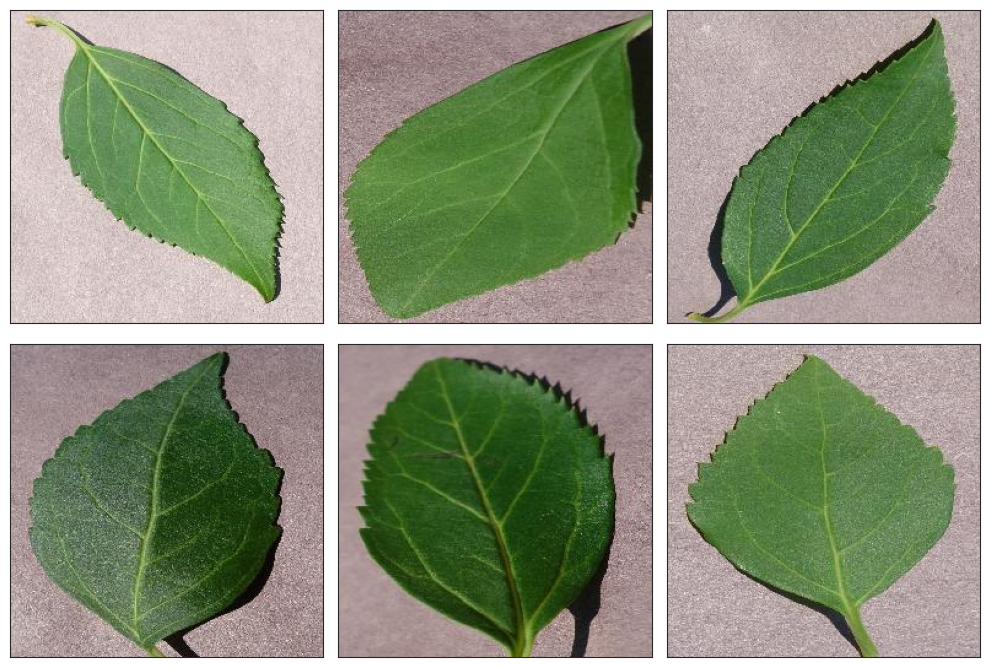

Sample data from label: powdery_mildew


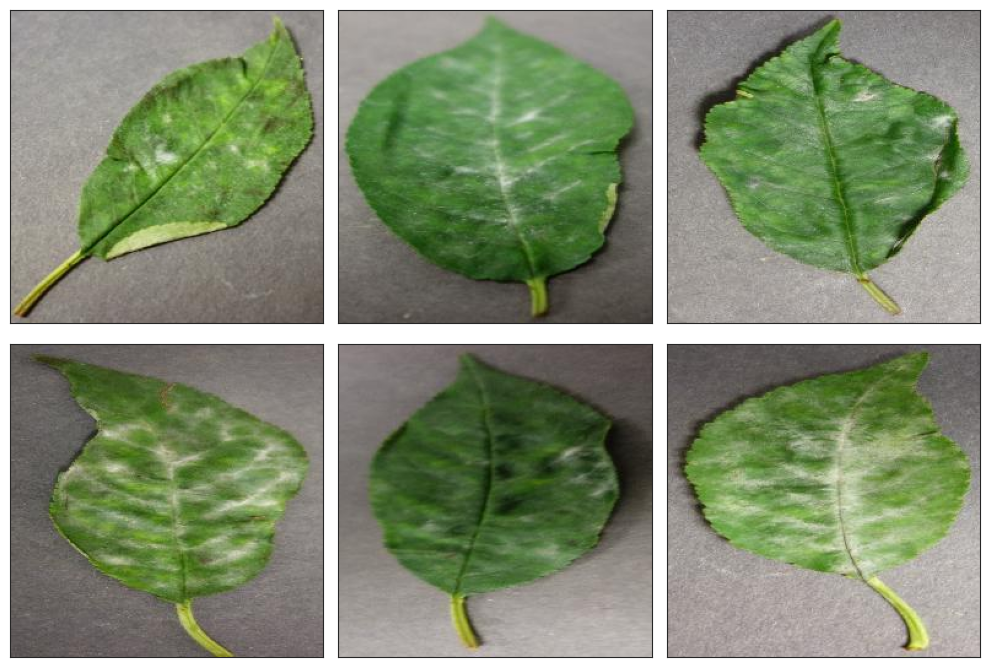

In [8]:
montage_rows = 2
montage_cols = 3
figsize=(10,7)

sns.set_style("white")
labels = os.listdir(train_data_dir)

for label in labels:
    print(f'Sample data from label: {label}')
    imgs_list = os.listdir(train_data_dir + '/' + label)
    imgs_sample = random.sample(imgs_list, montage_rows * montage_cols)

    # create list of axes indices based on montage_rows and montage_cols
    pos_index = []
    for i in range(0, montage_rows):
        for j in range(0, montage_cols):
            pos_index.append([i, j])

    # create a Figure and display images
    fig, axes = plt.subplots(nrows=montage_rows,ncols=montage_cols, figsize=figsize)
    for k in range(0, len(imgs_sample)):
        img = imread(train_data_dir + '/' + label + '/' + imgs_sample[k], 0)
        img_shape = img.shape
        axes[pos_index[k][0], pos_index[k][1]].imshow(img)
        axes[pos_index[k][0], pos_index[k][1]].set_xticks([])
        axes[pos_index[k][0], pos_index[k][1]].set_yticks([])
    plt.tight_layout()
    plt.savefig(fname=version_output+f'/img_montage_{label}')
    plt.show()
    

---

# Image Avarage and Variability

* Draw a random sample subset from both "healthy" and "powder_mildew" labels and store as numpy arrays

In [9]:
from tensorflow.keras.preprocessing import image

images_amount = 100

image_array, label_array = np.array([], dtype='int'), np.array([], dtype='object')

for label in labels:
  
  imgs_list = os.listdir(train_data_dir + '/' + label)
  imgs_sample = random.sample(imgs_list, images_amount)
  for image_sample in imgs_sample:
    img = image.load_img(train_data_dir + '/' + label + '/' + image_sample)
    if image.img_to_array(img).max() > 1: 
      img_norm = image.img_to_array(img) / 255
    else: 
      img_norm = image.img_to_array(img)
           
    image_array = np.append(image_array, img_norm).reshape(-1, img_norm.shape[0], img_norm.shape[1], img_norm.shape[2])
    label_array = np.append(label_array, label)



2023-05-22 10:59:45.661970: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 10:59:45.718500: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 10:59:45.719528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 10:59:47.237322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


* Calculate avarage image and image variability from sample.
* Create an image montage for each label (healthy and powdery mildew)

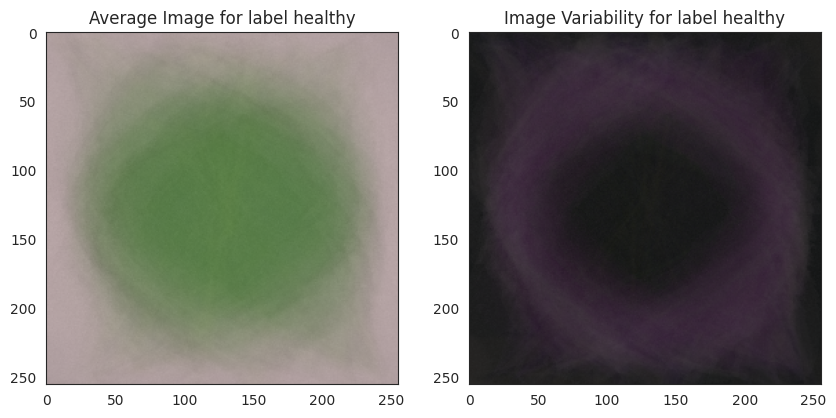

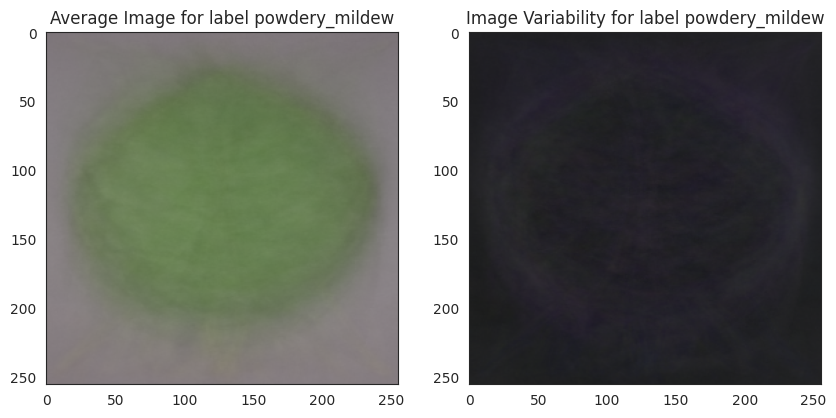

In [10]:
figsize=(10,5)

#store image avgs for comparisson
img_avgs = []
img_varblty = []
for label in labels:

    label_array = label_array.reshape(-1,1,1)
    boolean_mask = np.any(label_array==label,axis=1).reshape(-1)
    sample_array = image_array[boolean_mask]

    avg_img = np.mean(sample_array, axis = 0)
    img_avgs.append(avg_img)
    std_img = np.std(sample_array, axis = 0)
    img_varblty.append(std_img)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label}")
    axes[1].imshow(std_img, cmap='gray')
    plt.savefig(fname=version_output+f'/img_avg_and_varblty_{label}')
    plt.show()
    print("\n")


---

# Label Avarage Differentiation

* Calculate difference and plot difference, avarage for label "healthy" and avarage for label "powdery mildew"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


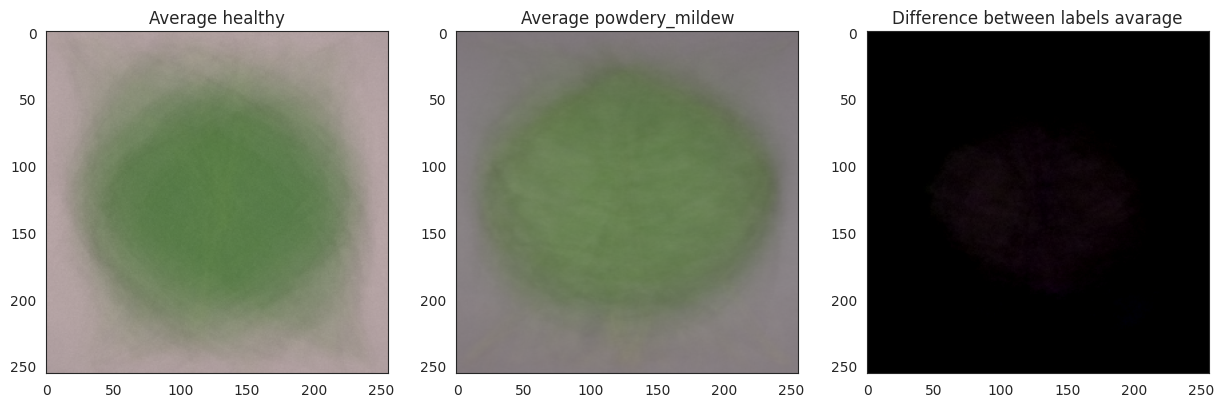

In [11]:

figsize = (15,5)


contrast_mean = img_avgs[1] - img_avgs[0]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
axes[0].imshow(img_avgs[0], cmap='gray')
axes[0].set_title(f'Average {labels[0]}')
axes[1].imshow(img_avgs[1], cmap='gray')
axes[1].set_title(f'Average {labels[1]}')
axes[2].imshow(contrast_mean, cmap='gray')
axes[2].set_title(f'Difference between labels avarage')
plt.savefig(fname=version_output+f'/diff_in_label_img_avg')
plt.show()

* Calculate difference and plot difference, variability for label "healthy" and variability for label "powdery mildew"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


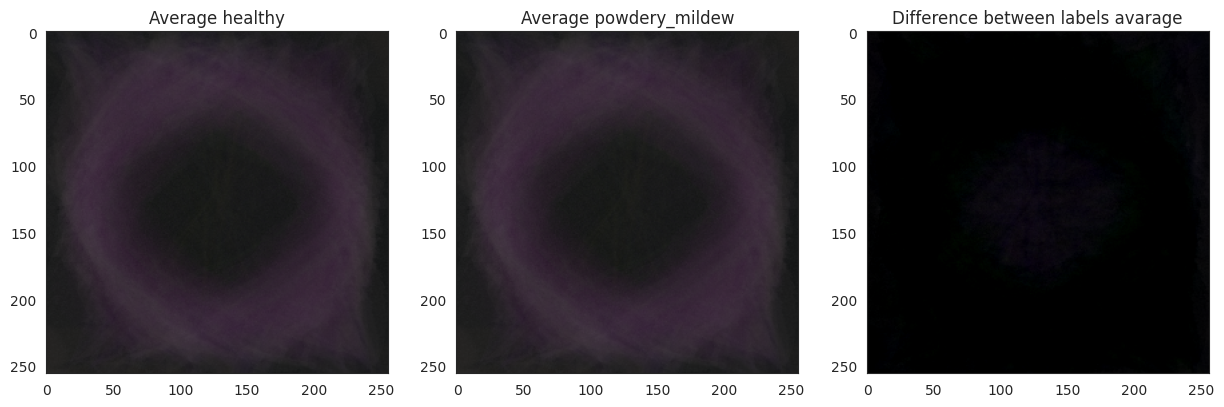

In [12]:

figsize = (15,5)

# calculate difference and plot difference, avg label1 and avg label2
contrast_varblty = img_varblty[1] - img_varblty[0]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
axes[0].imshow(img_varblty[0], cmap='gray')
axes[0].set_title(f'Average {labels[0]}')
axes[1].imshow(img_varblty[0], cmap='gray')
axes[1].set_title(f'Average {labels[1]}')
axes[2].imshow(contrast_varblty, cmap='gray')
axes[2].set_title(f'Difference between labels avarage')
plt.savefig(fname=version_output+f'/diff_in_label_img_varblty')
plt.show()

---

# Conclusions and Next Steps

*  The study strongly indicates that cherry leaves the have powdery mildew, are visually distinct from healthy cherry leaves. Based on the following;
  * The variability seems to follow a more distinct pattern for the label "healthy" when comparing the labels.
  * In the difference in variability montage, there is a slight indication that there is a higher variability on the surface "within" the leaf.
  * Though it is subtle, there seems to be a difference in avarage that shows a slightly lower avarage in the center of the images, where one would expect to find the "inside" of the leaf.
  * Another "finding" is that in the image montages displaying samples of the original images, there is a difference in that the edges of leaves with powdery mildew more often has irregular cracks and creases. This is hard to pick up in the calculated avarages and variabilities, but it seems to be an important "attribute" as well.
* This would indicate a good probability for succes in building a machine learning model that can differentiate the labels. 